In [92]:
from math import *
import numpy as np
from matplotlib import pyplot as plt
import random

In [86]:
def f(x):
    return 1 / x

In [115]:
def F(x):
    return np.log(x)

In [87]:
ab = [1, e]

In [88]:
def split_interval(interval, n):
    interval_length = interval[1] - interval[0]
    split_length = interval_length / n
    splits = [interval[0]]
    while splits[-1] + split_length < interval[1] - 1e-10:
        splits.append(splits[-1] + split_length)
    splits.append(interval[1])
    return splits

In [155]:
def integral_sum_method_rectangles(f, split, how="middle"):
    if how not in ["left", "right", "middle", "random"]:
        raise NotImplementedError(f"integral_sum only supports 'left', 'right', 'middle', 'random', not {how}")
    integral_sums = []

    if how == "left":
        for i in range(len(split) - 1):
            integral_sums.append(f(split[i]) * (split[i + 1] - split[i]))
    elif how == "right":
        for i in range(len(split) - 1):
            integral_sums.append(f(split[i + 1]) * (split[i + 1] - split[i]))
    elif how == "middle":
        for i in range(len(split) - 1):
            integral_sums.append(f((split[i] + split[i + 1]) / 2) * (split[i + 1] - split[i]))
    elif how == "random":
        for i in range(len(split) - 1):
            integral_sums.append(f(random.uniform(split[i], split[i + 1])) * (split[i + 1] - split[i]))

    return integral_sums

In [156]:
def method_trapezes(f, split):
    integral_sums = []
    for i in range(1, len(split)):
        integral_sums.append((f(split[i - 1]) + f(split[i])) * (split[i] - split[i - 1]) / 2)
    return integral_sums

In [157]:
def simpson_method(f, split):
    integral_sums = []

    for i in range(1, len(split)):
        integral_sums.append((f(split[i - 1]) + 4 * f((split[i - 1] + split[i]) / 2) + f(split[i])) * (split[i] - split[i - 1]) / 6)
    return integral_sums

In [158]:
def make_plot(method, function, interval, n, ax, **kwargs):
    split = split_interval(interval, n)
    results = method(function, split, **kwargs)

    x = np.linspace(interval[0], interval[1], 1000)
    y = function(x)

    delta_x = (interval[1] - interval[0]) / n

    ax.plot(x, y)
    for i in range(1, len(split)):
        ax.bar((split[i - 1] + split[i]) / 2, results[i - 1] / delta_x, width=delta_x, align='center')

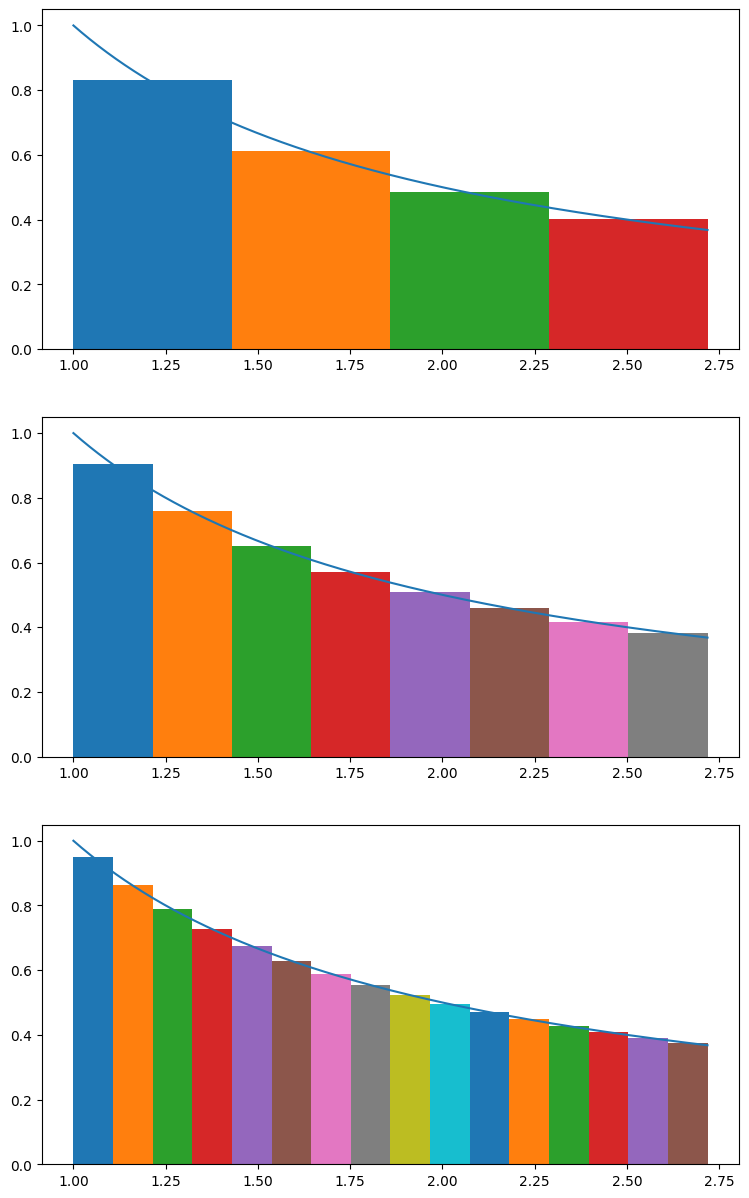

In [159]:
n_values_for_viz = [4, 8, 16]

fig, axs = plt.subplots(len(n_values_for_viz), 1, figsize=(3 * len(n_values_for_viz), 15))

for i in range(len(n_values_for_viz)):
    make_plot(simpson_method, f, ab, n_values_for_viz[i], axs[i])

In [160]:
expected = sum(method_trapezes(f, split_interval(ab, 1000)))
expected

1.0000002127429328

In [161]:
methods = [
    (integral_sum_method_rectangles, "Метод прямоугольникова слева:", {"how": "left"}),
    (integral_sum_method_rectangles, "Метод прямоугольникова справа:", {"how": "right"}),
    (integral_sum_method_rectangles, "Метод прямоугольникова по середине:", {"how": "middle"}),
    (integral_sum_method_rectangles, "Метод прямоугольникова рандом:", {"how": "random"}),
    (method_trapezes, "Метод трапеций:", {}),
    (simpson_method, "Метод симпсонов:", {})
]

n_values = [2 ** i for i in range(8)]

In [164]:
for method in methods:
    for n in n_values:
        print(f"{method[1]} {n} разбиений: {sum(method[0](f, split_interval(ab, n), **method[2]))}")

Метод прямоугольникова слева: 1 разбиений: 1.718281828459045
Метод прямоугольникова слева: 2 разбиений: 1.3212580714895323
Метод прямоугольникова слева: 4 разбиений: 1.148809187538947
Метод прямоугольникова слева: 8 разбиений: 1.0711921495839634
Метод прямоугольникова слева: 16 разбиений: 1.0347724848846056
Метод прямоугольникова слева: 32 разбиений: 1.0171789587625568
Метод прямоугольникова слева: 64 разбиений: 1.0085375698797092
Метод прямоугольникова слева: 128 разбиений: 1.004255801996311
Метод прямоугольникова справа: 1 разбиений: 0.6321205588285577
Метод прямоугольникова справа: 2 разбиений: 0.7781774366742885
Метод прямоугольникова справа: 4 разбиений: 0.8772688701313253
Метод прямоугольникова справа: 8 разбиений: 0.9354219908801524
Метод прямоугольникова справа: 16 разбиений: 0.9668874055327
Метод прямоугольникова справа: 32 разбиений: 0.9832364190866042
Метод прямоугольникова справа: 64 разбиений: 0.9915663000417326
Метод прямоугольникова справа: 128 разбиений: 0.9957701670773

In [165]:
true_value = 1.0

In [168]:
results = {}

for method in methods:
    results[method[1]] = []
    for n in n_values:
        results[method[1]].append(sum(method[0](f, split_interval(ab, n), **method[2])))

In [169]:
results

{'Метод прямоугольникова слева:': [1.718281828459045,
  1.3212580714895323,
  1.148809187538947,
  1.0711921495839634,
  1.0347724848846056,
  1.0171789587625568,
  1.0085375698797092,
  1.004255801996311],
 'Метод прямоугольникова справа:': [0.6321205588285577,
  0.7781774366742885,
  0.8772688701313253,
  0.9354219908801524,
  0.9668874055327,
  0.9832364190866042,
  0.9915663000417326,
  0.9957701670773228],
 'Метод прямоугольникова по середине:': [0.9242343145200194,
  0.976360303588362,
  0.9935751116289794,
  0.9983528201852478,
  0.9995854326405086,
  0.9998961809968614,
  0.9999740341129126,
  0.9999935078312036],
 'Метод прямоугольникова рандом:': [1.0829094820845087,
  0.9067032056932612,
  1.0468211262330591,
  0.9841722051429832,
  1.0026348924410835,
  1.0023241476037799,
  0.9991820846740341,
  0.9999829890749763],
 'Метод трапеций:': [1.1752011936438014,
  1.0497177540819105,
  1.0130390288351363,
  1.003307070232058,
  1.0008299452086526,
  1.0002076889245806,
  1.00005

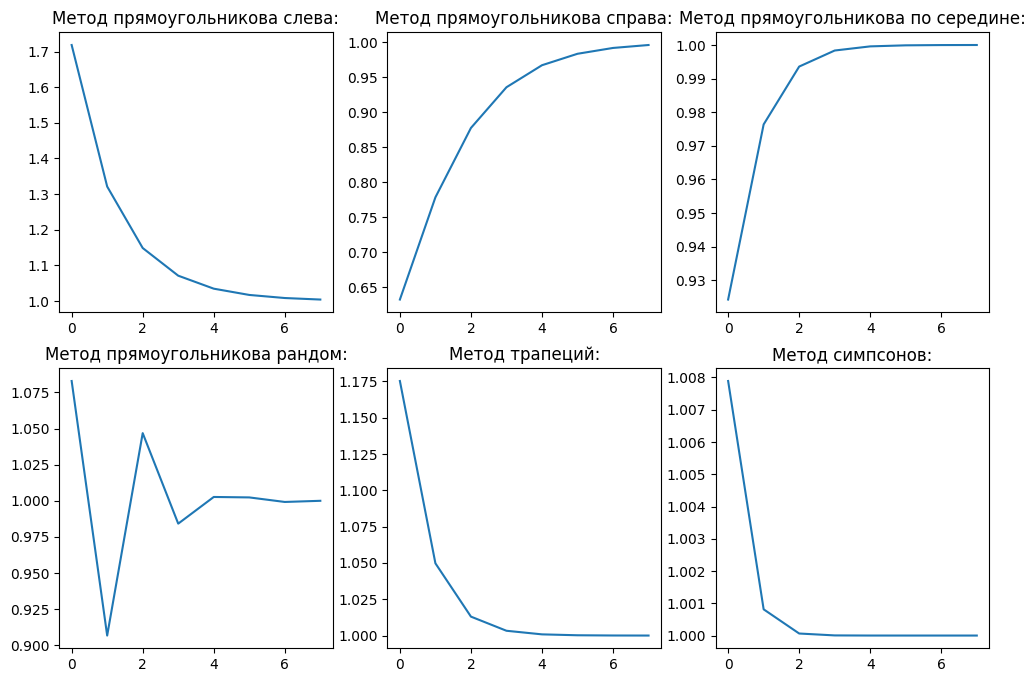

In [173]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()

for i, key in enumerate(results):
    axs[i].plot(results[key])
    axs[i].set_title(key)

Text(0.5, 0.98, 'MAE')

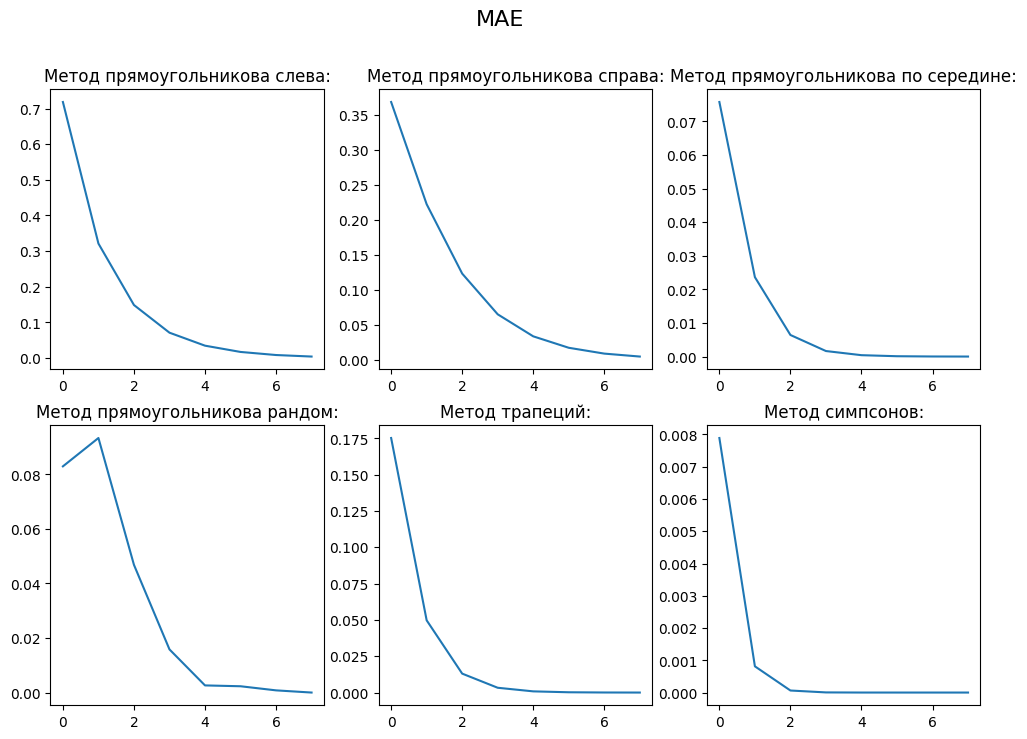

In [176]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()

for i, key in enumerate(results):
    axs[i].plot([abs(i - true_value) for i in results[key]])
    axs[i].set_title(key)
fig.suptitle('MAE', fontsize=16)

Text(0.5, 0.98, 'MSE')

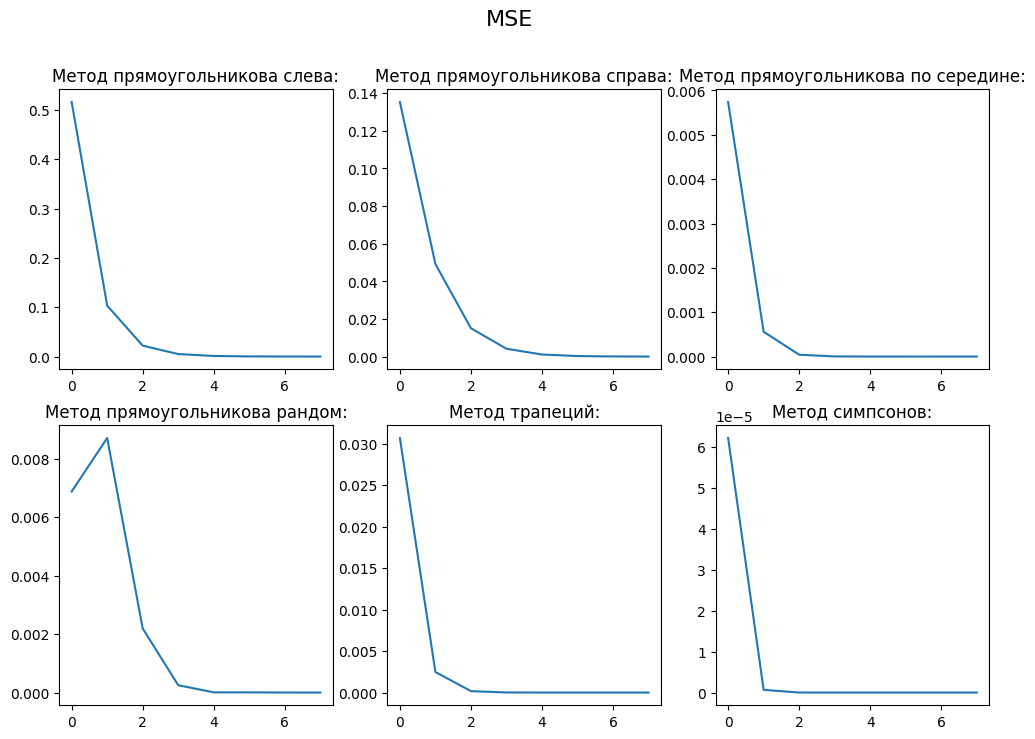

In [177]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()

for i, key in enumerate(results):
    axs[i].plot([(i - true_value) ** 2 for i in results[key]])
    axs[i].set_title(key)
fig.suptitle('MSE', fontsize=16)